## Data Set: OWID COVID Data
### Please check their repository
### https://github.com/owid/covid-19-data/tree/master/public/data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.tail()

In [2]:
# DtypeWarning: Columns (33) have mixed types. Check the column 33.
df.iloc[:,33].unique()

array([nan, 'tests performed', 'units unclear', 'samples tested',
       'people tested'], dtype=object)

#### There might have both numeric and non-numeric data in that column.
#### we can correct this by: df = pd.read_csv('owid-covid-data.csv', dtype={33: str})

In [3]:
df.shape

(376919, 67)

In [4]:
df_US = df[df['location']=='United States']
df_US.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
356287,USA,North America,United States,2024-02-04,103436829.0,NaN,NaN,1170784.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
356288,USA,North America,United States,2024-02-05,NaN,NaN,NaN,NaN,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
356289,USA,North America,United States,2024-02-06,NaN,NaN,NaN,NaN,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
356290,USA,North America,United States,2024-02-07,NaN,NaN,NaN,NaN,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
356291,USA,North America,United States,2024-02-08,NaN,NaN,NaN,NaN,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN


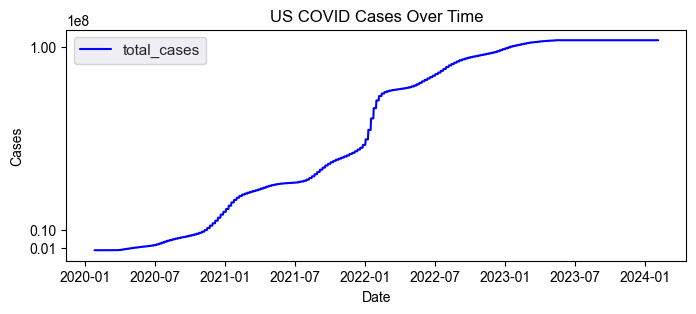

In [5]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.set_theme(style="darkgrid")

# Plot the data
sns.lineplot(data=df_US, x='date', y='total_cases', label='total_cases', color='blue')

# Set y-axis scale to linear
ax.set_yscale('linear')

# # Extract years for x-axis label
# years = df_US['date'].dt.year.unique()
# plt.xticks(ticks=df_US['date'], labels=years)

yticks = [10**6, 10**7, 10**8]
ax.set_yticks(yticks)

ax.set_xlabel('Date')
ax.set_ylabel('Cases')
ax.set_title('US COVID Cases Over Time')

plt.show()

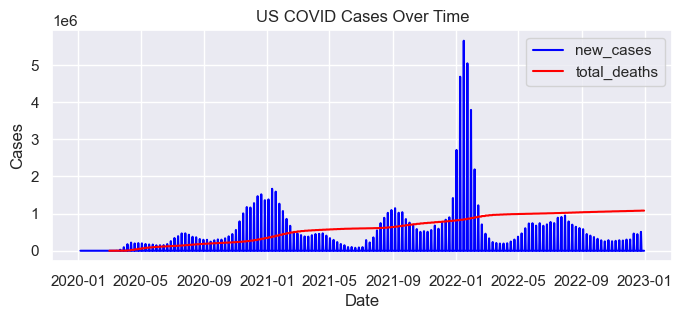

In [6]:
# Dataset stop updating new cases in the middle of 2023. Using data before 2023 only
df_US_2022 = df[(df['location']=='United States')&(df['date'].dt.year <= 2022)]
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(8, 3))

# Plot the data
sns.lineplot(data=df_US_2022, x='date', y='new_cases', label='new_cases', color='blue')
sns.lineplot(data=df_US_2022, x='date', y='total_deaths', label='total_deaths', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Cases')
ax.set_title('US COVID Cases Over Time')

plt.show()